# Adult Census Income Dataset

Lo siguiente se obtuvo del repositorio de aprendizaje automático de la UCI.

Estos datos fueron extraídos de la base de datos de la oficina del censo de 1994 por Ronny Kohavi y Barry Becker (Minería y visualización de datos, Silicon Graphics). Se extrajo un conjunto de registros razonablemente limpios utilizando las siguientes condiciones: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). La tarea de predicción es determinar si una persona gana más de 50.000 dólares al año.

Descripción de fnlwgt (peso final)

Las ponderaciones de los archivos de la Encuesta de Población Actual (CPS) se controlan según estimaciones independientes de la población civil no institucional de Estados Unidos. Estos son preparados mensualmente para nosotros por la División de Población aquí en la Oficina del Censo. Usamos 3 conjuntos de controles. Estos son:

Una estimación de una sola celda de la población mayor de 16 años para cada estado.
Controles de origen hispano por edad y sexo.
Controles por Raza, edad y sexo.
Usamos los tres conjuntos de controles en nuestro programa de ponderación y los "rastrillamos" 6 veces para que al final volvamos a todos los controles que usamos. El término estimación se refiere a los totales de población derivados de la CPS mediante la creación de "recuentos ponderados" de cualquier característica socioeconómica específica de la población. Las personas con características demográficas similares deberían tener pesos similares. Hay una advertencia importante que debemos recordar acerca de esta afirmación. Es decir, dado que la muestra de CPS es en realidad una colección de 51 muestras estatales, cada una con su propia probabilidad de selección, la afirmación sólo se aplica dentro del estado.

# 1. Análisis exploratorio de datos:

> - Descargar y cargar el conjunto de datos.
> - Explorar el conjunto de datos, visualizar histogramas, detectar correlaciones, identificar outliers, manejar valores faltantes y revisar tipos de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def load_and_preprocess_data(file_path):
    # Cargar el conjunto de datos omitiendo la primera fila
    df = pd.read_csv(file_path, header=None, skiprows=1)

    # Asignar nombres a las columnas
    column_names = ["age", "workclass", "fnlwgt", "education", "education.num",
                    "marital.status", "occupation", "relationship", "race", "sex",
                    "capital.gain", "capital.loss", "hours.per.week", "native.country", "income"]

    df.columns = column_names
    return df

# Asignar el DataFrame a una variable global
df = load_and_preprocess_data("adult.csv")

In [3]:
def display_basic_info(df):
    # Visualizar las primeras filas del DataFrame
    print(df.head())

    # Información general del conjunto de datos
    print(df.info())

    # Estadísticas descriptivas
    print(df.describe())

In [4]:
def handle_numerical_columns(df):
    # Filtrar solo las columnas numéricas
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Verificar y convertir el tipo de datos de las columnas numéricas
    for column in numerical_columns:
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError as e:
            print(f"Error en la columna {column}: {e}")
            print(f"Valores únicos en la columna {column}: {df[column].unique()}")

    return df

In [5]:
def handle_categorical_columns(df):
    # Reemplazar '?' con NaN en el DataFrame
    df.replace('?', np.nan, inplace=True)

    # Convertir columnas categóricas al tipo adecuado
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column] = df[column].astype('category')

        # Verificar la existencia de la columna 'income' antes de visualizar
        if 'income' in df.columns:
            plt.figure(figsize=(10, 6))
            plot = sns.countplot(data=df, x=df[column], hue='income')
            plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
            plt.title(f'Distribución de {column} por ingresos')
            plt.show()
        else:
            print(f"La columna 'income' no está presente en el conjunto de datos después de las manipulaciones.")

    return df

In [6]:
def handle_missing_values(df):
    # Reemplazar '?' con NaN en el DataFrame
    df.replace('?', np.nan, inplace=True)

    # Imprimir información sobre valores faltantes
    missing_values = df.isnull().sum()
    print("Valores faltantes por columna:\n", missing_values)

In [7]:
def visualize_outliers(df):
    # Identificar outliers (valores atípicos)
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot de {column}")
        plt.show()

In [8]:
def visualize_histograms(df):
    # Visualizar histogramas para variables numéricas después de manejar los valores faltantes
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    numerical_df.hist(bins=20, figsize=(15, 10))
    plt.show()

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


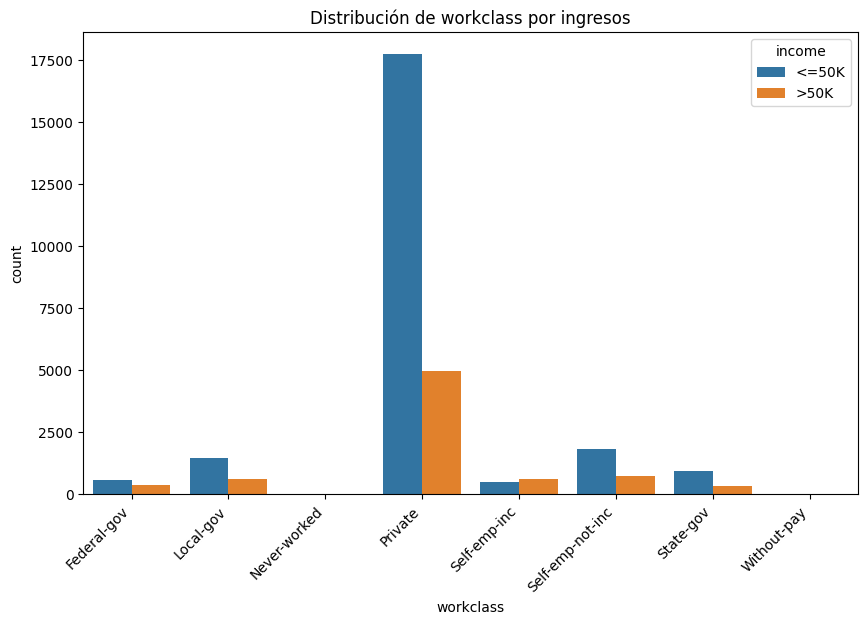

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


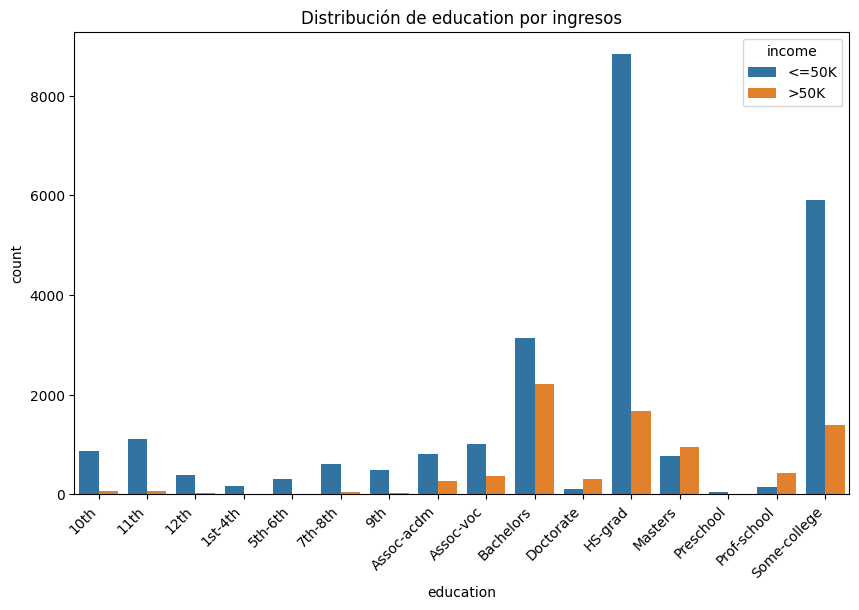

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


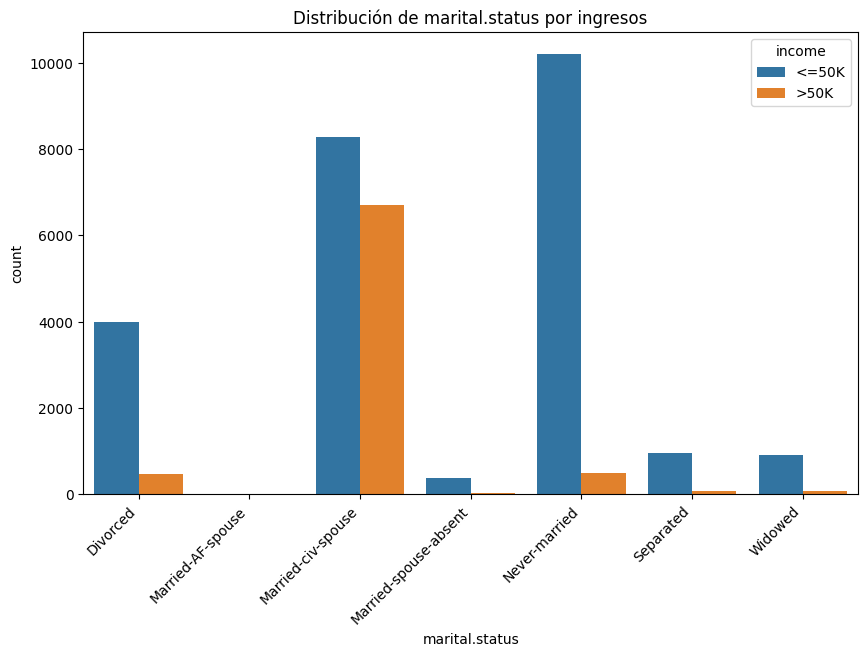

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


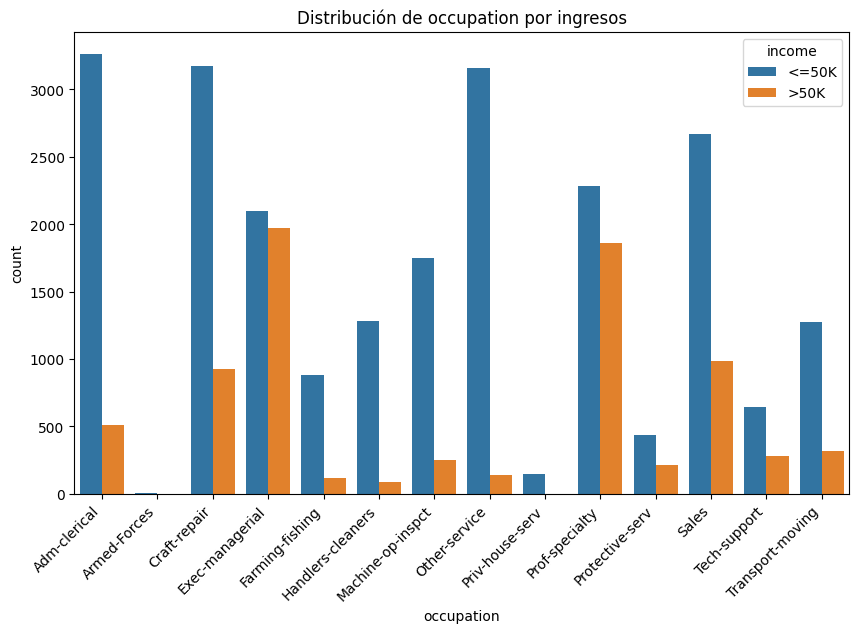

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


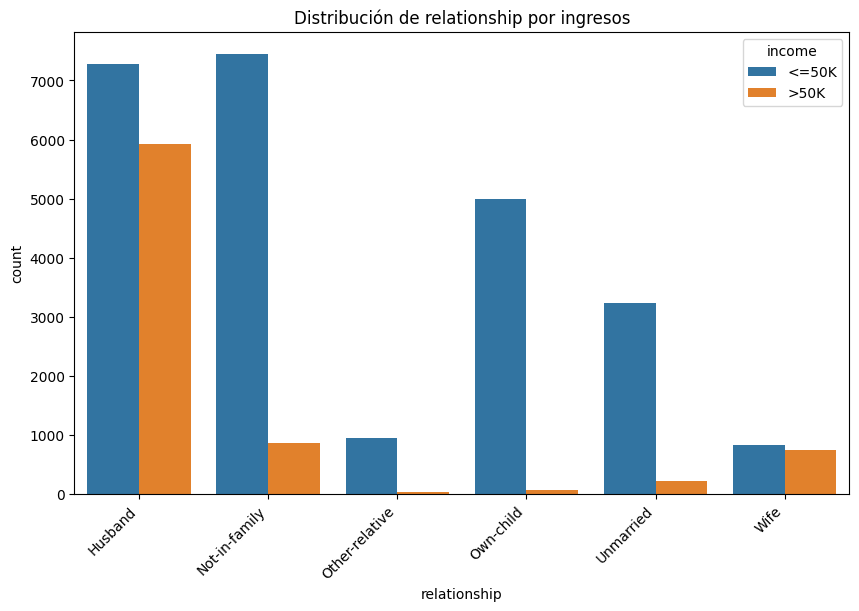

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


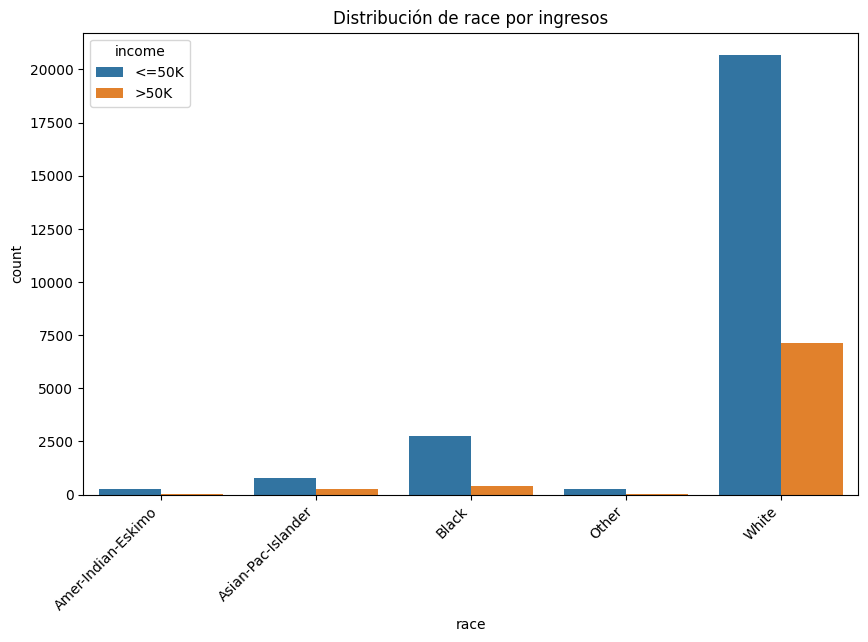

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


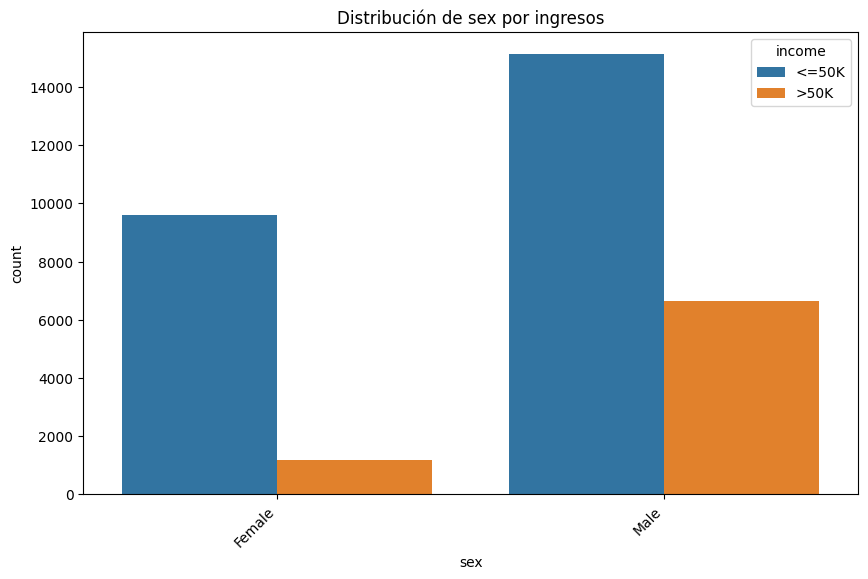

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


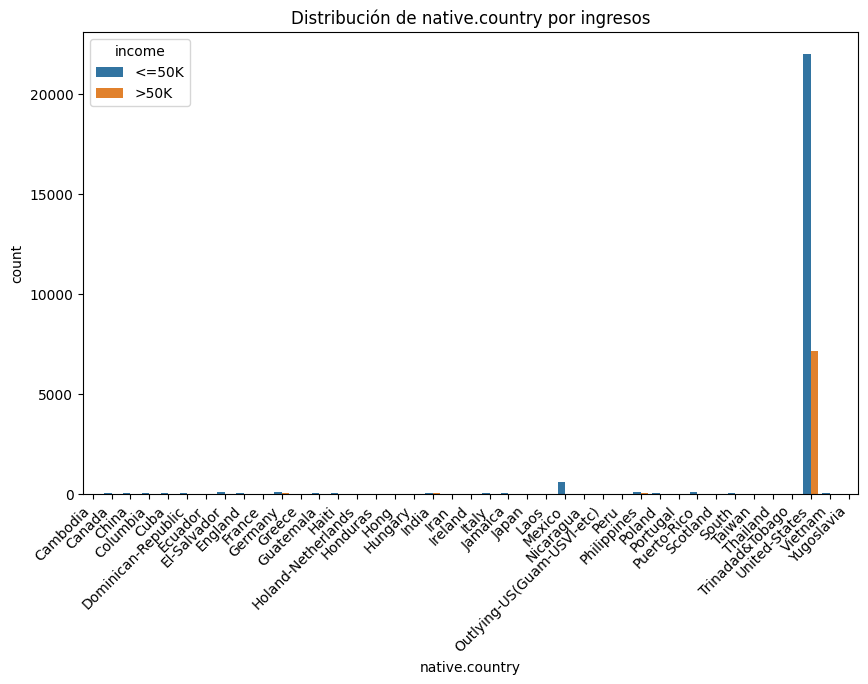

C:\Users\Terán\AppData\Local\Temp\ipykernel_5084\3335392256.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


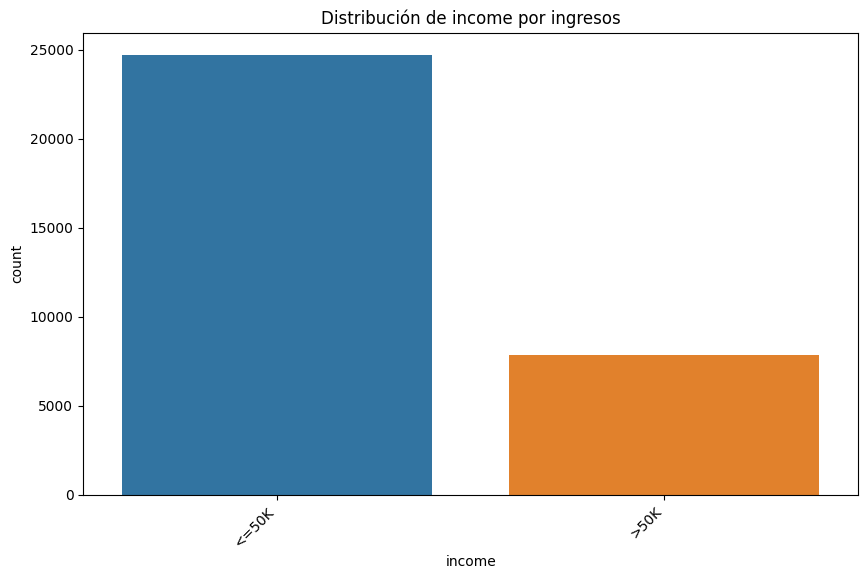

Valores faltantes por columna:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


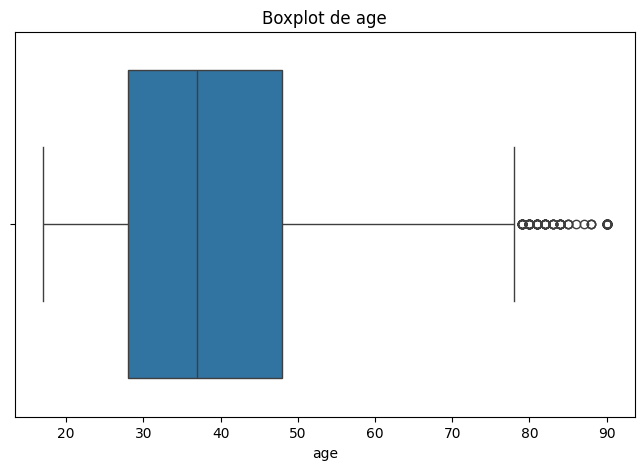

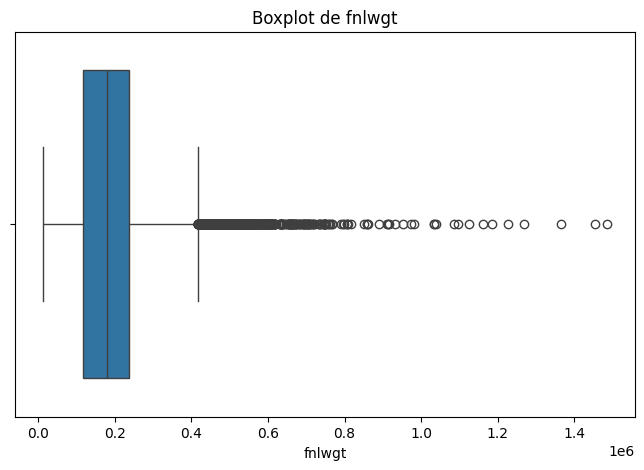

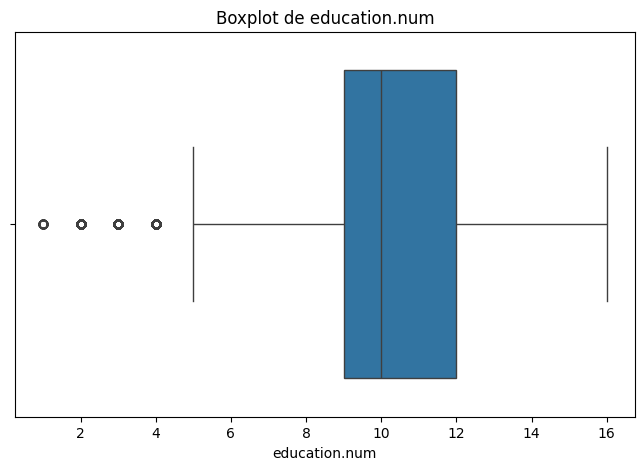

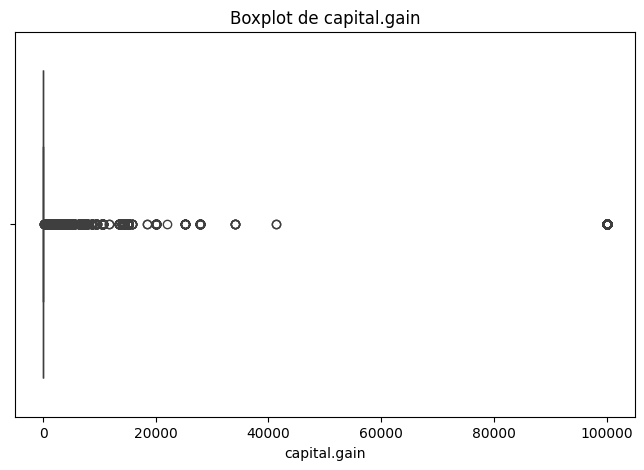

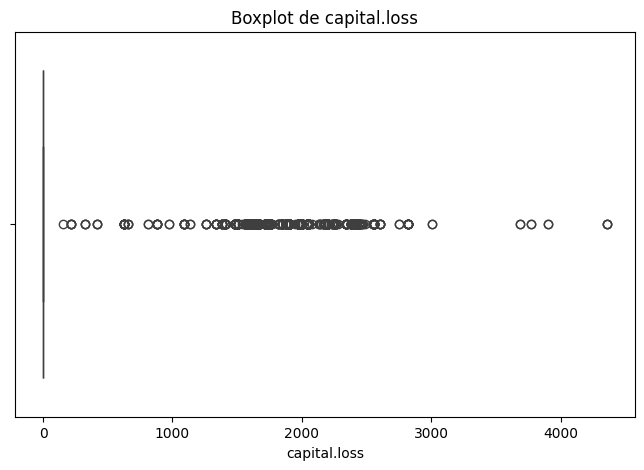

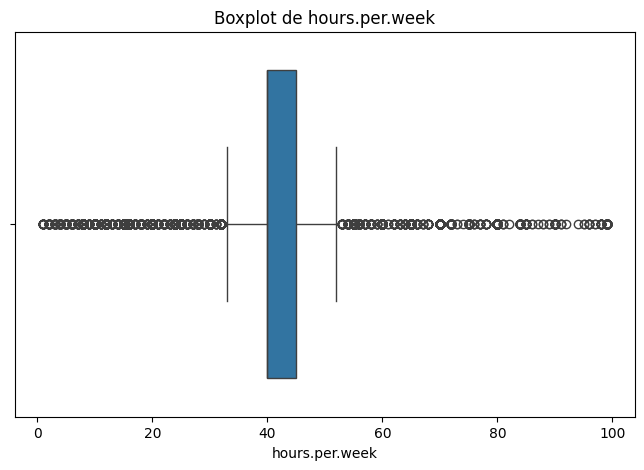

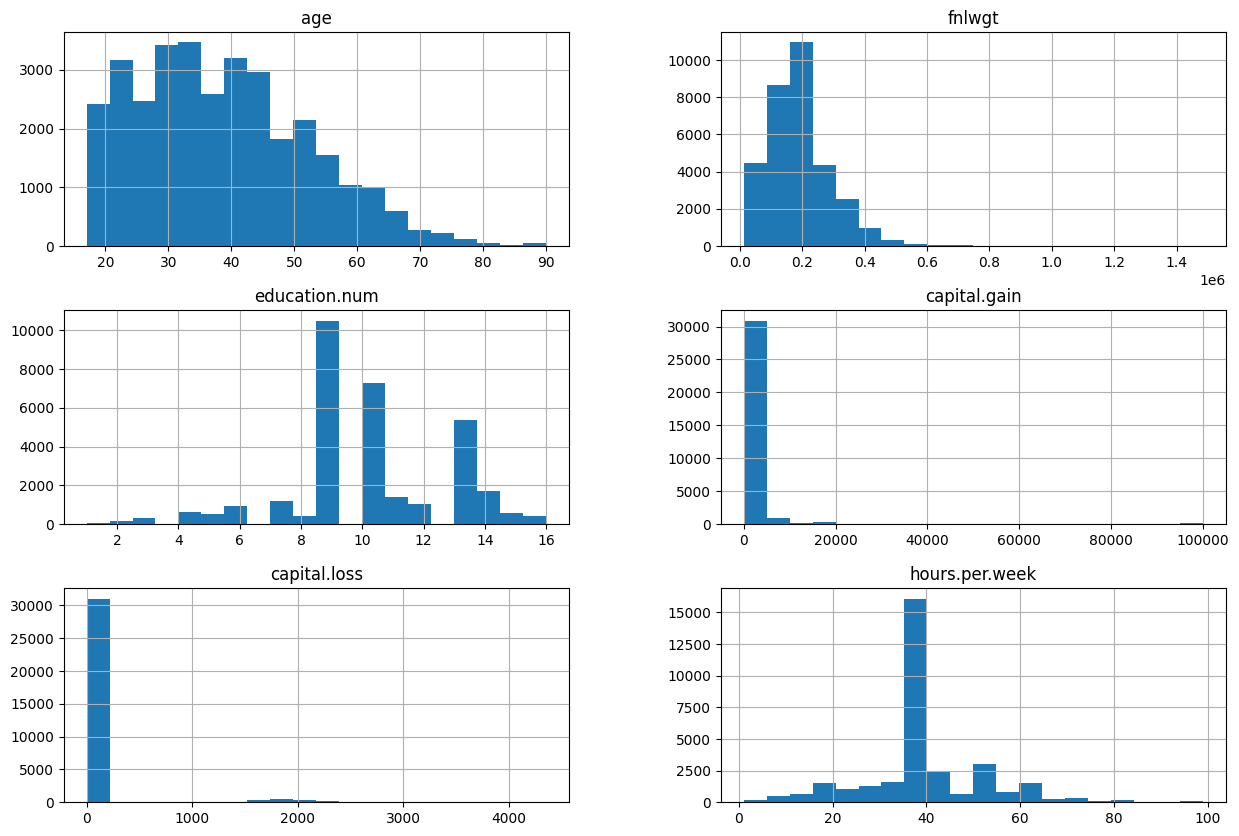

In [9]:
def main():
    file_path = "adult.csv"
    
    # Paso 1: Cargar y preprocesar datos
    df = load_and_preprocess_data(file_path)

    # Paso 2: Mostrar información básica
    display_basic_info(df)

    # Paso 3: Manipular columnas numéricas
    df = handle_numerical_columns(df)

    # Paso 4: Manipular columnas categóricas
    df = handle_categorical_columns(df)

    # Paso 5: Manejar valores faltantes
    handle_missing_values(df)

    # Paso 6: Visualizar outliers
    visualize_outliers(df)

    # Paso 7: Visualizar histogramas
    visualize_histograms(df)

if __name__ == "__main__":
    main()

# 2. Ingeniería/selección de características + limpieza de datos:

> - Realizar la ingeniería de características, si es necesario.
> - Utilizar la ganancia de información mutua para seleccionar características relevantes.
> - Limpiar los datos si es necesario

In [10]:
# Ejemplo de creación de una nueva característica
df['capital_ratio'] = df['capital.gain'] / (df['capital.loss'] + 1)

> ***Transformación de características:***

Aplica transformaciones a características existentes si es necesario. Puedes utilizar funciones matemáticas, escalado, o normalización según las necesidades.

In [11]:
# Ejemplo de escalado de una característica
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

> ***Selección de Características con Ganancia de Información Mutua:***

Utilizar la Ganancia de Información Mutua (GIM):
Utiliza la biblioteca scikit-learn para calcular la GIM entre las características y la variable objetivo ('income'). Selecciona las características más relevantes.

In [14]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Reemplazar '?' con NaN
df.replace('?', np.nan, inplace=True)

# Imputar valores faltantes (puedes cambiar esto según tus necesidades)
df.fillna(df.mode().iloc[0], inplace=True)

# Obtener las características y la variable objetivo
X = df.drop('income', axis=1)
y = df['income']

# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Calcular GIM para cada característica
mutual_info = mutual_info_classif(X, y)

# Mostrar la importancia de cada característica
feature_importance = pd.Series(mutual_info, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

relationship      0.115347
marital.status    0.111480
capital.gain      0.082651
capital_ratio     0.079452
age               0.069420
age_scaled        0.068090
education.num     0.067302
education         0.065571
occupation        0.049453
hours.per.week    0.046098
capital.loss      0.035202
fnlwgt            0.032360
sex               0.026318
workclass         0.015709
native.country    0.012411
race              0.008018
dtype: float64


In [15]:
# Identificar y manejar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
capital_ratio     0
age_scaled        0
dtype: int64


In [26]:
# Obtener columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Imputar valores faltantes solo en columnas numéricas
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [27]:
# Obtener columnas no numéricas
non_numerical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Imputar valores faltantes en columnas no numéricas
df[non_numerical_columns] = df[non_numerical_columns].fillna(df[non_numerical_columns].mode().iloc[0])

In [28]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [29]:
# Visualizar las primeras filas del DataFrame
print(df.head())

# Guardar el DataFrame procesado
df.to_csv('dataset_procesado.csv', index=False)

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

  income  capital_ratio  age_scaled  workclass_Federal-gov  ...  \
0  <=50K            0.0    1.000000                  False  ...   
1  <=50K            0.0    0.890411                  False  ...   
2  <=50K            0.0    0.671233                  False  ...   
3  <=50K            0.0    0.506849                  False  ...   
4  <=50K            0.0    0.328767                  False  ...   

   native.country_Portugal  native.country_Puerto-Rico  \
0                    False                       False   
1                 